## Calories Burnt Prediction using Machine Learning with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
calories = pd.read_csv('Data/calories.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise = pd.read_csv('Data/exercise.csv')

In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
# Merging calories column with exercise dataframe
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
calories_data.shape

(15000, 9)

In [9]:
# Checking for null values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
# Checking data types of columns in calories_data
calories_data.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [11]:
rows = calories_data.shape[0]
columns = calories_data.shape[1]

print("Total rows:", rows)
print("Total columns:", columns)

Total rows: 15000
Total columns: 9


In [12]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [13]:
# Get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [14]:
# Count the number of Male and Female
calories_data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [15]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

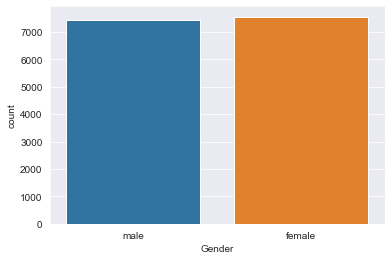

In [16]:
# Plot a graph for Gender column in count plot
sns.countplot(x='Gender', data=calories_data)

In [17]:
sns.set()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

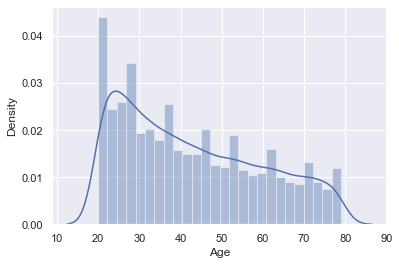

In [18]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

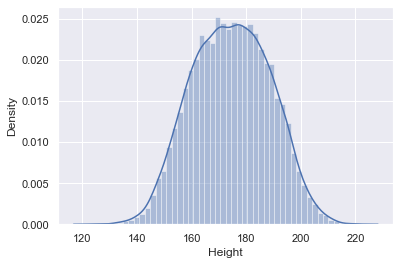

In [19]:
#  Plot a graph for Duration column in time plot
sns.distplot(calories_data['Height'])

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

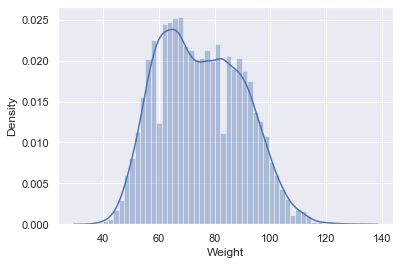

In [20]:
# Plot a graph for Heart_Rate column in time plot
sns.distplot(calories_data['Weight'])

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

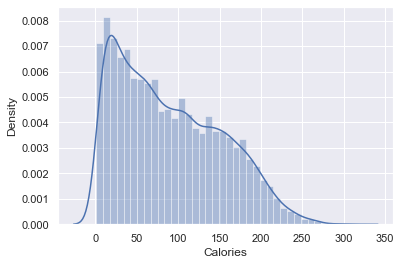

In [21]:
# Plot a graph for Body_Temp column in time plot
sns.distplot(calories_data['Calories'])

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

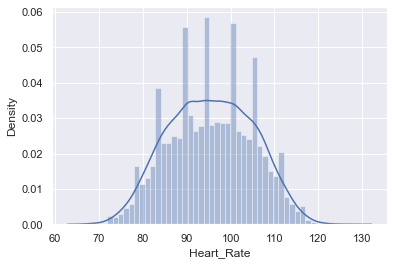

In [22]:
# Plot a graph for Calories column in time plot
sns.distplot(calories_data['Heart_Rate'])

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

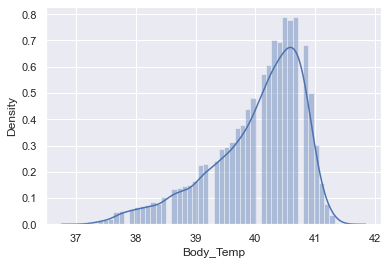

In [23]:
sns.distplot(calories_data['Body_Temp'])

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

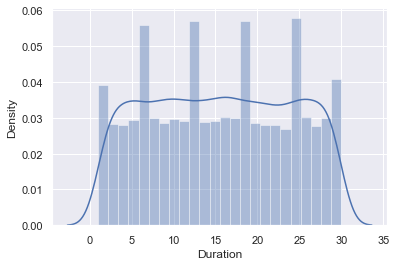

In [24]:
sns.distplot(calories_data['Duration'])

IndexError: index 9 is out of bounds for axis 0 with size 8

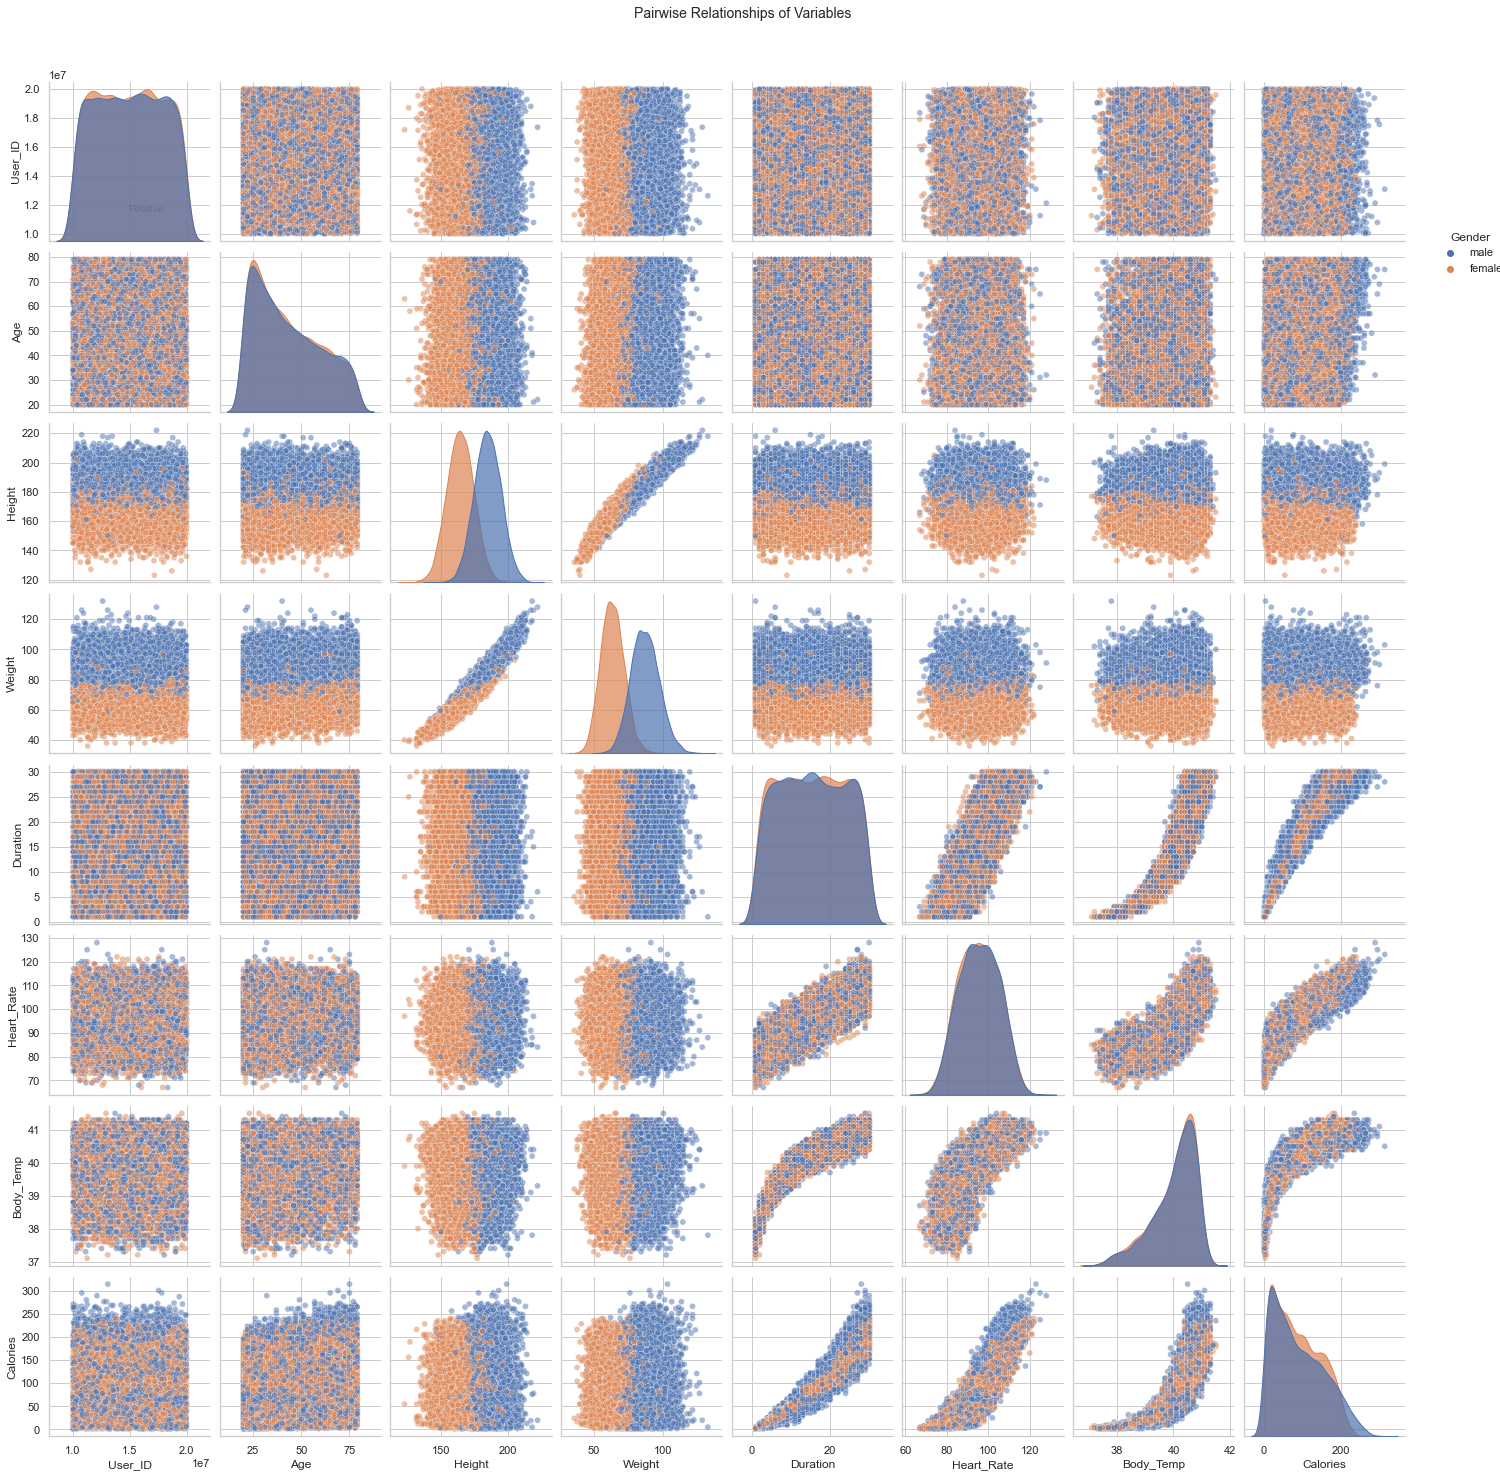

In [25]:
# Plot a graph for Gender column
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('whitegrid')

# Create the pairplot
g = sns.pairplot(calories_data, hue='Gender', diag_kws={'alpha': 0.7}, plot_kws={'alpha': 0.5})

# Customize the plot
g.fig.suptitle('Pairwise Relationships of Variables', y=1.03, fontsize=14)
g._legend.set_title('Gender')
g._legend.set_bbox_to_anchor([1, 0.85])

# Add annotations
annotations = [
    ('Calories', 'Weight', 'Positive'),
    ('Calories', 'Height', 'Negative'),
    ('Calories', 'Age', 'No clear relationship'),
    ('Weight', 'Height', 'Positive'),
    ('Weight', 'Age', 'No clear relationship'),
    ('Height', 'Age', 'No clear relationship')
]

for a in annotations:
    g.axes[0, 0].annotate(a[2], xy=(0.6, 0.2), xycoords='axes fraction', fontsize=10, ha='center', va='center')
    g.axes[calories_data.columns.get_loc(a[0]) + 1, calories_data.columns.get_loc(a[1])].annotate(a[2], xy=(0.6, 0.2), xycoords='axes fraction', fontsize=10, ha='center', va='center')

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

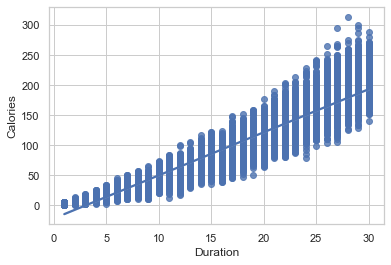

In [26]:
# corelation bewteen the data
sns.regplot(x='Duration', y='Calories', data=calories_data)

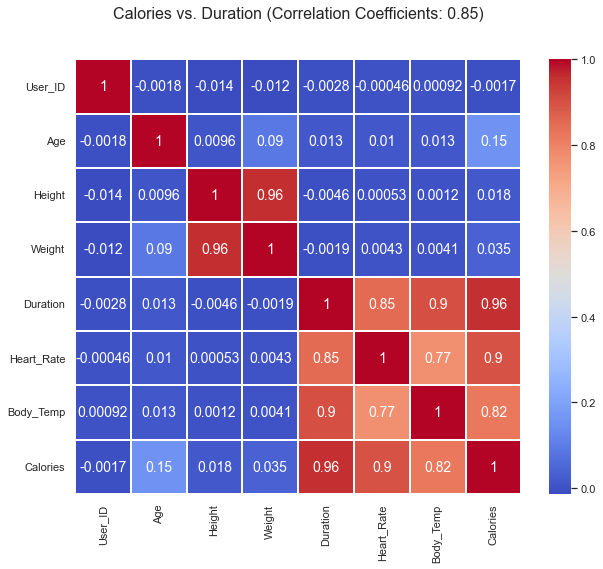

In [27]:
# plot the cirelation  between the  with heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('whitegrid')

# Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(calories_data.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 14}, linewidths=1)
plt.title('Calories vs. Duration (Correlation Coefficients: 0.85)', y=1.08, fontsize=16)
plt.show()

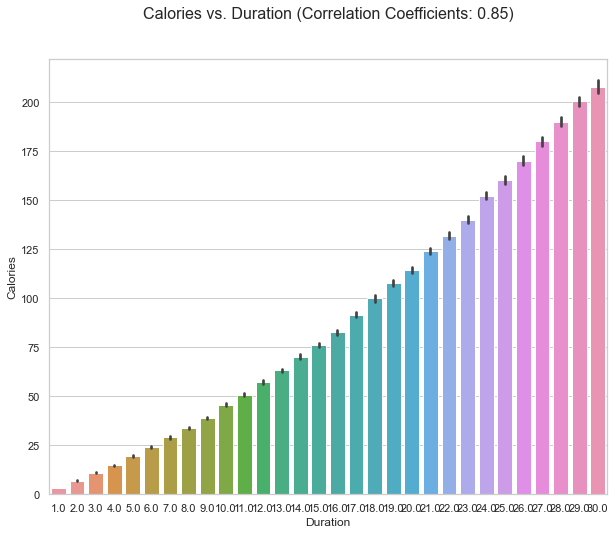

In [28]:
#  plot the cirelation betwee the  with bar plot
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('whitegrid')

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Duration', y='Calories', data=calories_data)
plt.title('Calories vs. Duration (Correlation Coefficients: 0.85)', y=1.08, fontsize=16)
plt.show()

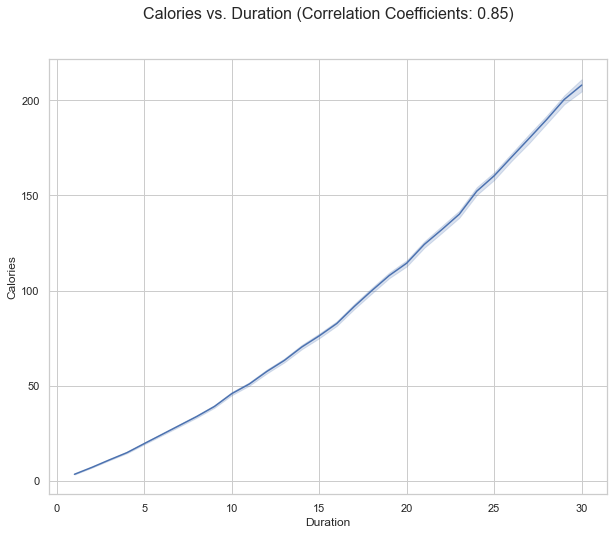

In [29]:
# plot the cirelation between the  with line plot
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('whitegrid')

# Create the plot
plt.figure(figsize=(10, 8))
sns.lineplot(x='Duration', y='Calories', data=calories_data)
plt.title('Calories vs. Duration (Correlation Coefficients: 0.85)', y=1.08, fontsize=16)
plt.show()

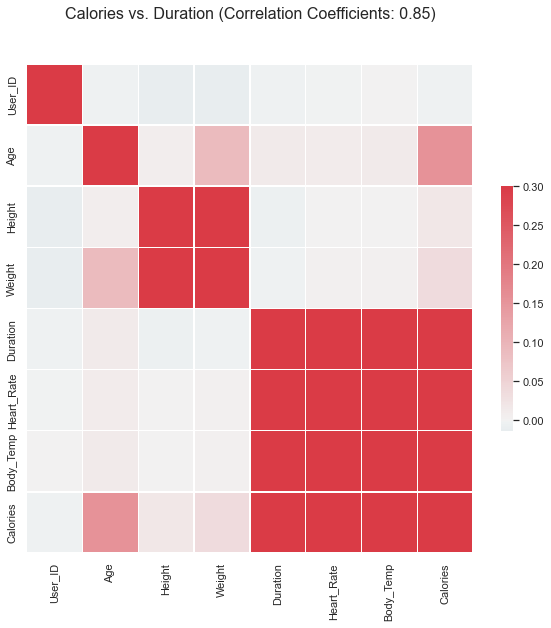

In [30]:
# finding positive and negative correlation
correlation = calories_data.corr()

# masking the correlation matrix with NaN values
mask = correlation.where(np.isfinite(correlation))

# setting the plot dimensions
f, ax = plt.subplots(figsize=(10, 9))

# creating the custom palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plotting the heatmap
sns.heatmap(mask, cmap=cmap, vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Calories vs. Duration (Correlation Coefficients: 0.85)', y=1.08, fontsize=16)
plt.show()

In [31]:
'''
Change Gender column to numeric
male  = 0
female = 1
'''
gender_mapping = {'male': 0, 'female': 1}

# Convert Gender column to numeric
calories_data['Gender'] = calories_data['Gender'].map(gender_mapping)

# Display the converted 'Gender' column
print(calories_data['Gender'])

0        0
1        1
2        0
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    0
14999    0
Name: Gender, Length: 15000, dtype: int64


In [ ]:
calories_data.head()

In [32]:
# slip the data into train and test split
from sklearn.model_selection import train_test_split

X_data = calories_data.drop(['Calories', 'Duration'], axis=1)
y_data = calories_data['Calories']
X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_data, test_size=0.3, random_state=42)

In [33]:
# XgbRegressor Object to train the model
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_test, y_test)
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
# XgbRegressor Object to make predictions
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# make predictions for a new set of data
y_pred = xgb.predict(X_test)
y_pred

array([165.45442 , 154.74615 ,  56.530136, ...,  45.853497, 179.54175 ,
       145.91777 ], dtype=float32)

In [36]:
# evaluate the trained model with custom data
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 218.95054394615312


In [69]:
# evaluate the model with default data with dummy data and check the accuracy with the model
import numpy as np
from xgboost import XGBRegressor

# Define the input data
data = np.array([[0, 68, 190.0, 94.0, 29.0, 105.0, 40.8, 231.0]])

# Create a sample XGBoost model
xgb_model = XGBRegressor()

# Prepare the training data
x_train = np.array([[0, 68, 190.0, 94.0, 29.0, 105.0, 40.8, 231.0]])
y_train = np.array([14733363])

# Map gender to numerical values
gender_mapping = {'Male': 0, 'Female': 1}
gender = 'Male'  # Set the gender value for the input data
encoded_gender = gender_mapping.get(gender, gender)

# Add the gender column to the input data
data_with_gender = np.column_stack((data, [encoded_gender]))

# Fit the model with the training data
xgb_model.fit(x_train, y_train)

# Define the feature names in the correct order
feature_names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'gender']

# Extract the input data without the gender column
input_data = data_with_gender[:, :-1]

# Make predictions
y_pred = xgb_model.predict(input_data)

# Print the prediction details
print("Input Features:")
for feature, value in zip(feature_names, data[0]):
    print(f"{feature}: {value}")
print(f"Gender: {gender}")

print("\nPrediction:")
print("Predicted Value:", y_pred)

Input Features:
f0: 0.0
f1: 68.0
f2: 190.0
f3: 94.0
f4: 29.0
f5: 105.0
f6: 40.8
f7: 231.0
Gender: Male

Prediction:
Predicted Value: [14733360.]
